# Summarizing metrics from disturbed XS +y

Leanne Friedrich 4/26/23

## initialization

In [ ]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [6]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_xsy_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [7]:
# create object that handles summary data
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'XS+ySDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolderR
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, spacing_adj, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnorma_adj, sup_dnormd, sup_dnormd_adj, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


In [ ]:
# plot a variable across many steps in the printing process
ssi = ms.ss
yvl = mp.yvarlines(ms, ssi, xvar='int_Ca', yvar='yTop', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.XSSDTIdeals('+y')
                   , logx=True, mode='scatter', dx=0.15)
yvl.fig

In [13]:
# get a list of files that have measurements within a certain range
ms.reduceRows('xc_w3o', yvarmin=0.5)

,ink_shortname,sup_shortname,int_Ca,spacing,xc_w3o
801,SO8-S85-0.05,3.5,3.47,0.5,0.52


In [14]:
# open the folder number based on row in the ms.ss dataframe, in windows explorer
ms.openFolder(801)

# export plots

In [ ]:
# plot vertical shift for single/double lines
yvl = mp.shiftPlotXS(ms, 'HIP', xvar='ReProd', export=True)
yvl.fig

In [ ]:
# plot vertical shift for triple lines
yvl = mp.shiftPlot3XS(ms, 'HIP', xvar='ReProd', export=True)
yvl.fig

# regressions

In [4]:
# export regression tables and relevant plots
def exportRegression(var, **kwargs) -> None:
    mp.regressionTableSDT(ms, ms.ss, var, logy=False, printOut=False,  package='tabularShort', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, tag='HIPx', exportFolder=os.path.join(cfg.path.fig, 'SDT'), **kwargs)

In [ ]:
exportRegression('delta_yBot_disturb1')
exportRegression('delta_yBot_disturb1', Camin=15)
exportRegression('delta_yBot_write2')

exportRegression('delta_yTop_disturb1')
exportRegression('delta_yTop_write2')

In [ ]:
exportRegression('delta_yBot_disturb2')
exportRegression('delta_yBot_disturb2', Camax=1)
exportRegression('delta_yBot_write3')

exportRegression('delta_yTop_disturb2')
exportRegression('delta_yTop_write3')

In [ ]:
exportRegression('delta_yTop_disturb2', spacing=0.5)
exportRegression('delta_yTop_write3', spacing=0.5)

## h

,variable,Spearman coeff,Spearman p
0,$Re_{ink}\times Re_{sup}$,0.51,2.2e-21
1,$\eta_{ink}\times \eta_{sup}$,-0.51,2.5e-21


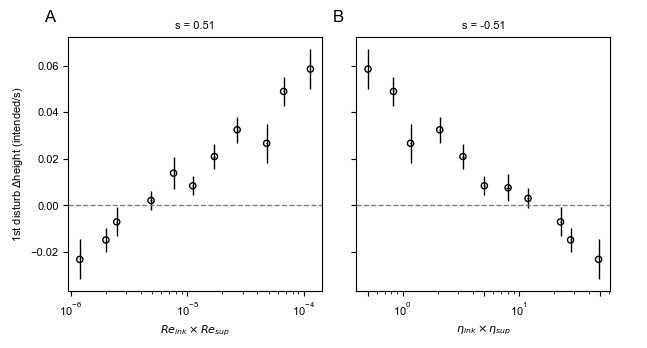

In [31]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_h_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.51,2.0e-04
1,$Ca_{sup}$,-0.51,2.0e-04
2,$\overline{d_{PR.sup.desc}}$,-0.53,8.3e-05
3,$Oh_{sup}$,-0.58,1.0e-05


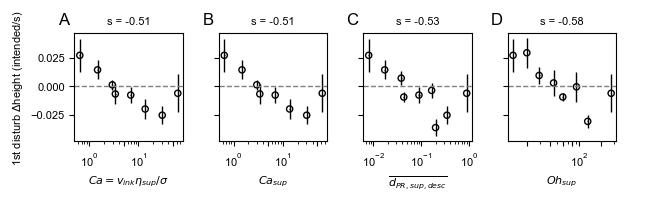

In [32]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_h_disturb1', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,-0.42,2.5e-03


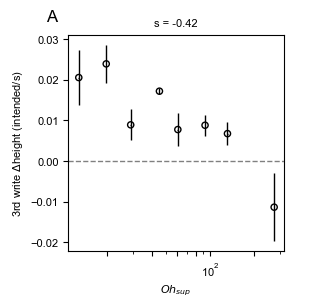

In [70]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_h_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
3,$We_{ink}/We_{sup}$,-0.31,3.1e-02


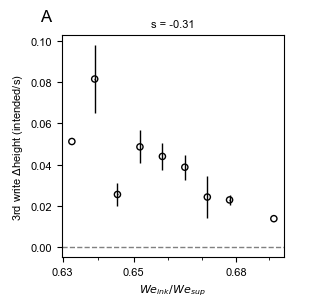

In [71]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'delta_h_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## w

,variable,Spearman coeff,Spearman p
0,spacing,-0.36,1.7e-10


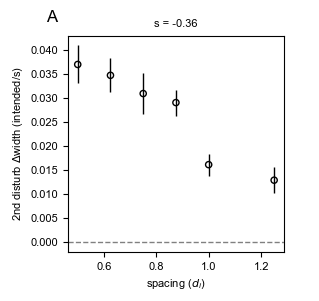

In [61]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_w_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.47,1.1e-17


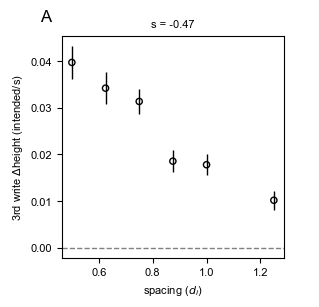

In [69]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_h_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## yc

,variable,Spearman coeff,Spearman p
0,$Ga_{ink}/Ga_{sup}$,-0.73,1.5e-149
1,$Gd_{ink}/Gd_{sup}$,-0.75,3.8e-159
2,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.69,2.5e-125
3,$Ca_{ink}/Ca_{sup}$,-0.71,4.5e-134
4,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.69,2.5e-125
5,$\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...,-0.64,4.3e-102
6,$Oh_{ink}/Oh_{sup}$,-0.71,6.3e-134
7,$Re_{ink}/Re_{sup}$,0.71,7.2e-134
8,$\eta_{ink}/\eta_{sup}$,-0.71,4.5e-134


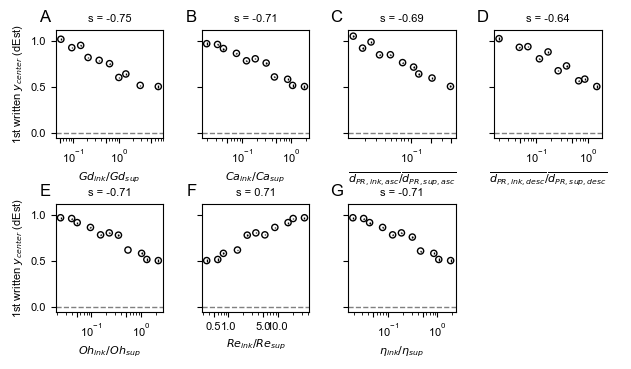

In [38]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'yc_w1o',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## yBot

In [43]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_disturb1',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
31,$Re_{ink}$,-0.42,1.74e-14
43,$\eta_{ink}$,0.42,1.74e-14


In [44]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_disturb1', Camin=15,  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.54,6.13e-04


In [45]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_write2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.19,2.57e-06


In [46]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_write2', spacing=0.5,  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
48,$\tau_{y.ink.asc}\times \tau_{y.sup.asc}$,0.38,1.15e-04


,variable,Spearman coeff,Spearman p
1,spacing_adj,-0.50,8.6e-04


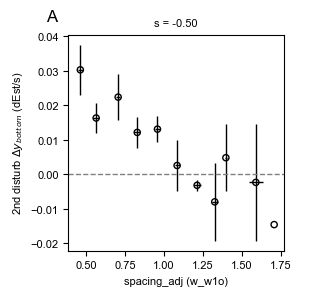

In [52]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yBot_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [9]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_disturb2', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
36,$Re_{i}\times Re_{s}$,-0.37,0.01


,variable,Spearman coeff,Spearman p
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,0.12,4.6e-02
3,$\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...,0.12,4.6e-02


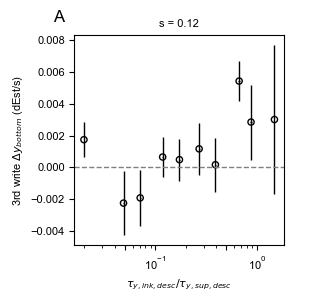

In [67]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## yTop

In [6]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_disturb1',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Re_{sup}$,0.49,1.4e-19
1,$\eta_{sup}$,-0.49,1.4e-19


In [42]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_disturb1', spacing=0.5,  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
31,$Re_{sup}$,0.42,2.64e-03
43,$\eta_{sup}$,-0.42,2.64e-03
47,$\tau_{y.sup.asc}$,-0.42,2.64e-03
51,$\tau_{y.sup.desc}$,-0.42,2.64e-03


,variable,Spearman coeff,Spearman p
0,spacing,-0.53,2.9e-04


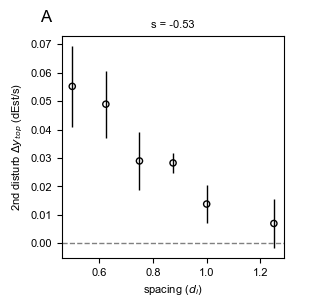

In [53]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yTop_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [11]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_disturb2', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p


In [5]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.42,6.83e-14


,variable,Spearman coeff,Spearman p
0,spacing,-0.59,2.1e-28


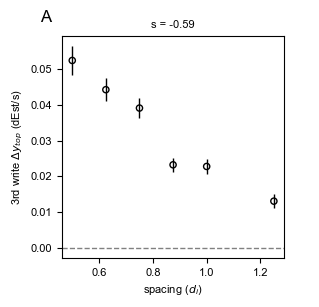

In [62]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_write3',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [9]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_write3', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
25,$We_{i}/We_{s}$,-0.37,9.50e-03


,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,-0.34,1.6e-02


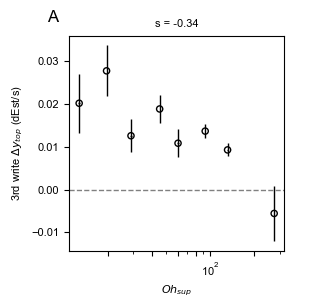

In [65]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_write3', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)